In [1]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
model_dir = "llama-moe/LLaMA-MoE-v1-3_5B-4_16"
tokenizer = AutoTokenizer.from_pretrained(model_dir, trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained(model_dir, torch_dtype=torch.bfloat16, trust_remote_code=True)
model.eval()
model.to("cuda:0")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/796 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

configuration_llama_moe.py:   0%|          | 0.00/4.41k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/llama-moe/LLaMA-MoE-v1-3_5B-4_16:
- configuration_llama_moe.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_llama_moe_hf.py:   0%|          | 0.00/66.6k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/llama-moe/LLaMA-MoE-v1-3_5B-4_16:
- modeling_llama_moe_hf.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin.index.json:   0%|          | 0.00/174k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/182k [00:00<?, ?B/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

LlamaMoEForCausalLM(
  (model): LlamaMoEModel(
    (embed_tokens): Embedding(32000, 4096, padding_idx=0)
    (layers): ModuleList(
      (0-31): 32 x LlamaMoEDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LinearGLUMoELayer(
          (gate): TopKBalancedNoisyGate(
            (gate_network): Sequential(
              (0): Linear(in_features=4096, out_features=16, bias=False)
              (1): Tanh()
              (2): Linear(in_features=16, out_features=16, bias=False)
            )
            (softmax): Softmax(dim=1)
            (weight_noise): Linear(in_features=4096, out_features=16, bias=False)
           

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch

input_text = "Paris is famous for"
inputs = tokenizer(input_text, return_tensors="pt")
inputs = inputs.to("cuda:0")
# embeddings = model.embeddings.word_embeddings(model_inputs['input_ids'])
# embeddings.retain_grad()

outputs = model(**inputs)


# loss = outputs.last_hidden_state.sum()
# loss.backward()

# gradients = embeddings.grad
# average_gradients = gradients[0].mean(dim=1).detach().numpy()

# plt.plot(average_gradients, marker='o')
# plt.title("Averaged Gradients for Input Tokens")
# plt.xlabel("Token Index")
# plt.ylabel("Average Gradient Value")
# plt.xticks(ticks=range(len(average_gradients)), labels=tokenizer.convert_ids_to_tokens(inputs['input_ids'][0]), rotation=45)
# plt.grid(True)
# plt.show()


In [ ]:
print(outputs.keys())

odict_keys(['logits', 'past_key_values', 'balance_loss', 'num_dropped_tokens', 'gate_load', 'gate_importance'])


In [ ]:
import
out = tokenizer.decode(outputs)
print(out)

In [ ]:
print(inputs['input_ids'].shape)

torch.Size([1, 7])


In [4]:
print(len(outputs["gate_importance"]))
print(len(outputs["gate_importance"][0]))
print(outputs["gate_importance"][0])

32
16
tensor([0.9297, 0.0000, 0.1553, 0.0000, 0.1953, 0.7500, 0.0000, 0.5195, 0.0000,
        0.2480, 0.4785, 0.8750, 0.2451, 0.2344, 0.0000, 0.3672],
       device='cuda:0', dtype=torch.bfloat16, grad_fn=<SumBackward1>)


In [ ]:
# python>=3.10

import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

model_dir = "llama-moe/LLaMA-MoE-v1-3_0B-2_16"
tokenizer = AutoTokenizer.from_pretrained(model_dir, trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained(model_dir, torch_dtype=torch.bfloat16, trust_remote_code=True)
model.eval()
model.to("cuda:0")

input_text = "Suzhou is famous of"
inputs = tokenizer(input_text, return_tensors="pt")
inputs = inputs.to("cuda:0")

pred = model.generate(**inputs, max_length=50, temperature=0.01)
print("Response:",tokenizer.decode(pred.cpu()[0], skip_special_tokens=True))
# print(pred.keys())
# Suzhou is famous of its beautiful gardens. The most famous one is the Humble Administrator's Garden. It is a classical Chinese garden with a history of more than 600 years. The garden is divided into three


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some weights of the model checkpoint at llama-moe/LLaMA-MoE-v1-3_0B-2_16 were not used when initializing LlamaMoEForCausalLM: {'model.layers.31.mlp.calculator.experts.parametrizations.weight.original0ate.15', 'model.layers.17.mlp.calculator.experts.parametrizations.weight.original0ate.5', 'model.layers.29.mlp.calculator.experts.parametrizations.weight.original0ate.11', 'model.layers.4.mlp.calculator.experts.parametrizations.weight.original0ate.10', 'model.layers.2.mlp.calculator.experts.parametrizations.weight.original0ate.2', 'model.layers.6.mlp.calculator.experts.parametrizations.weight.original0ate.3', 'model.layers.7.mlp.calculator.experts.parametrizations.weight.original0ate.14', 'model.layers.19.mlp.calculator.experts.parametrizations.weight.original0ate.12', 'model.layers.28.mlp.calculator.experts.parametrizations.weight.original0ate.9', 'model.layers.27.mlp.calculator.experts.parametrizations.weight.original0ate.12', 'model.layers.31.mlp.calculator.experts.parametrizations.weig

Response: Suzhou is famous of\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\


In [9]:
import numpy as np

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

def normalize(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

[1.         0.         0.1670168  0.         0.21008404 0.8067227
 0.         0.5588235  0.         0.26680672 0.5147059  0.9411765
 0.26365545 0.25210086 0.         0.394958  ]
[1.         0.12302632 0.28289473 0.17105263 0.16842106 0.16973685
 0.3105263  0.31973684 0.         0.14736842 0.         0.11710526
 0.         0.25263157 0.1131579  0.19605263]
[0.         0.         0.29813665 1.         0.38975155 0.32298136
 0.         0.3742236  0.9254658  0.36024845 0.9689441  0.7329193
 0.5310559  0.8447205  0.54037267 0.6583851 ]
[0.99248123 0.31390977 0.5451128  0.91729325 0.         0.38345864
 0.5338346  0.61278194 0.46804512 0.36654136 0.9398496  0.99248123
 0.         1.         0.6052632  0.94736844]
[0.26213592 0.9466019  0.28762135 0.31796116 0.20752427 0.
 0.3592233  0.36407766 0.19053398 0.         0.63106793 0.
 0.9368932  0.38349515 0.3276699  1.        ]
[0.9137056  0.         0.23096447 0.6040609  0.6903553  0.
 0.34517765 1.         0.         0.3680203  0.40862945 0.27

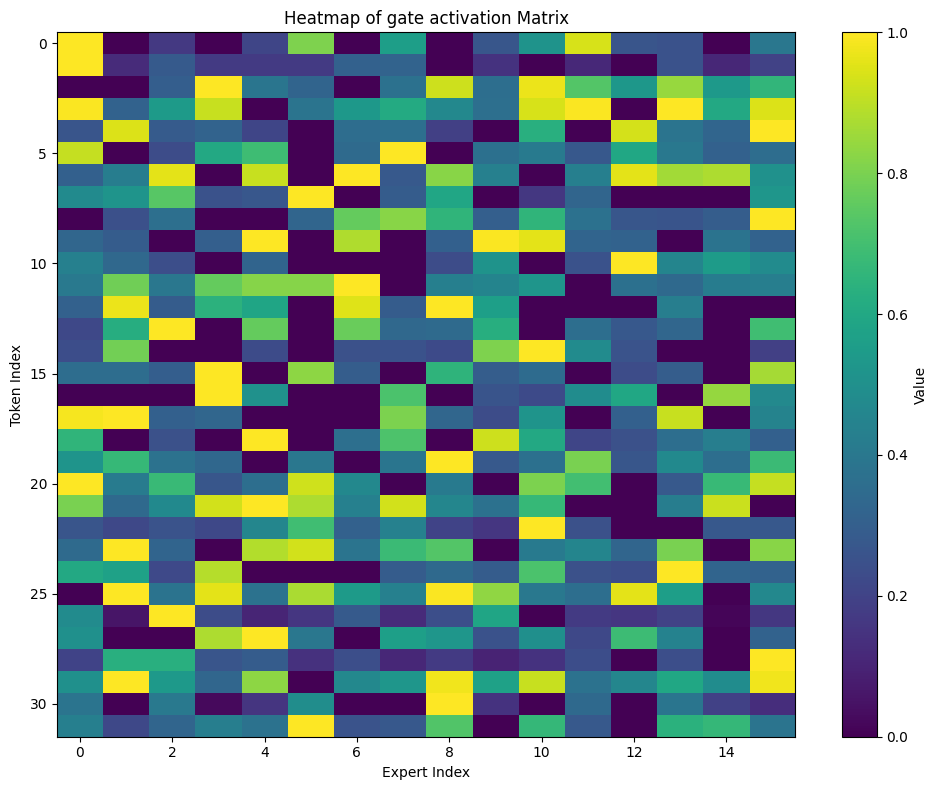

In [10]:
import numpy as np
import matplotlib.pyplot as plt

matrix = []

for i in range(len(outputs["gate_importance"])):
    # row = []
    row = outputs["gate_importance"][i].to(torch.float32).detach().cpu().numpy()
    row = normalize(row)
    # row = softmax(row)
    print(row)
    matrix.append(row)

matrix = np.array(matrix)

plt.figure(figsize=(10, 8))
plt.imshow(matrix, cmap='viridis', aspect='auto')
plt.colorbar(label='Value')

plt.title('Heatmap of gate activation Matrix')
plt.xlabel('Expert Index')
plt.ylabel('Token Index')

plt.tight_layout()
plt.show()